# Environment Check

The sys.executable command should contain the path to your environment. If it contains something like /root/ while you are using an environment then, there is and error. You can try to solve it by installing jupyter using the command:  
**conda install jupyter**  
while inside your anaconda environment.

In [1]:
import sys
sys.executable

'/home/lt-134/.conda/envs/kgl-forecast-keras/bin/python'

# Importing Jupyter modules

In [2]:
from IPython.display import display

# Importing Modules

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

% matplotlib inline

# Loading data
Put both train and test csv files from Kaggle inside **data** folder which in turn should be in the folder where your **notebook resides**.

In [5]:
train_df = pd.read_csv("data/train.csv")
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [7]:
test_df = pd.read_csv("data/test.csv")
test_df.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


# Check row details of the data frames

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Remove all incomplete and non-numerical features

In [10]:
to_drop = ["PassengerId", "Name", "Sex", "Age", "Ticket", 
           "Cabin", "Embarked", "Fare"]

In [12]:
train1 = train_df.drop(["PassengerId", "Name", "Sex", "Age", "Ticket", "Cabin", "Embarked", "Fare"], axis=1)
test1 = test_df.drop(["PassengerId", "Name", "Sex", "Age", "Ticket", "Cabin", "Embarked", "Fare"], axis=1)

# Correlation plot
Create a function to show correlation plot of provided data frame.

In [13]:
def show_corr(df):
    _, ax = plt.subplots(figsize=(8,6))

    # Colormap : Colors to denote correlation values
    cmap = sns.diverging_palette(250 , 10, s=68, 
                                 l=40, as_cmap = True )

    # Plotting heatmap using seaborn
    sns.heatmap(df.corr(), cmap=cmap,
                vmin=-1, vmax=1, annot=True)

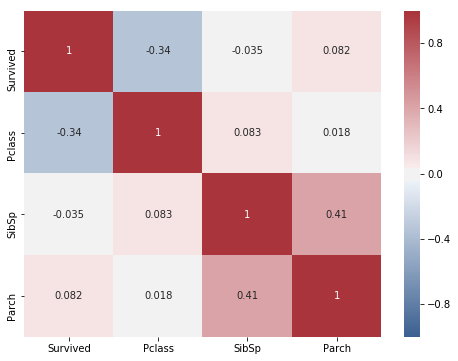

In [16]:
show_corr(train1)

In [17]:
train1.head(2)

,Survived,Pclass,SibSp,Parch
0,0,3,1,0
1,1,1,1,0


In [18]:
test1.head(2)

,Pclass,SibSp,Parch
0,3,0,0
1,3,1,0


# Create X (Features) and Y (Labels/Targets)

In [23]:
train1_x = train1.drop(["Survived"], axis=1)
train1_x.tail(3)

,Pclass,SibSp,Parch
888,3,1,2
889,1,0,0
890,3,0,0


In [22]:
train1_y = train1["Survived"]
train1_y.tail()

886    0
887    1
888    0
889    1
890    0
Name: Survived, dtype: int64

# Import Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Fit Data

In [25]:
clf_rf = RandomForestClassifier(random_state = 12)
clf_rf.fit(train1_x, train1_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

# Check score on Train data

In [26]:
clf_rf.score(train1_x, train1_y)

0.7216610549943884

# Make predictions on Test data

In [27]:
predictions1 = clf_rf.predict(test1)

# Function to convert predictions to Kaggle submission csv file
This function takes the original **test** data frame, the **predictions list**, a **filename** to save the csv file and **save** flag to determine if the csv file should be saved.

In [31]:
def kgl_submit_csv(df, predictions, savename = "my_predictions.csv", save=False):
    print("Number of predictions:", len(predictions))
    print("Number of passengers", len(df["PassengerId"]))
    
    kgl_df = pd.DataFrame({
        "PassengerId" : df["PassengerId"],
        "Survived" : predictions
    })
    
    if save:
        print("Saving using savename: ", savename)
        kgl_df.to_csv(savename, index=False)
    
    return kgl_df

In [32]:
a = kgl_submit_csv(test_df, predictions1, savename="p.csv", save=True)

Number of predictions: 418
Number of passengers 418
Saving using savename:  p.csv


# Verdict
.  
.  
.  
.  
.  
.  
.  
.  
.  
The predictions get a score of 68.42% on Kaggle Test data.